<a href="https://colab.research.google.com/github/BeccaOY/friendly-waffle/blob/main/Azure_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load data from a text file
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')

# Remove any rows with missing data
df_students = df_students.dropna(axis=0, how='any')

# Calculate who passed, assuming '60' is the grade needed to pass
passes  = pd.Series(df_students['Grade'] >= 60)

# Save who passed to the Pandas dataframe
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)


# Print the result out into this notebook
df_students 

--2021-10-25 21:20:34--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322 [text/plain]
Saving to: ‘grades.csv.1’

grades.csv.1        100%[===================>]     322  --.-KB/s    in 0s      

2021-10-25 21:20:34 (13.4 MB/s) - ‘grades.csv.1’ saved [322/322]



,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


In [3]:
# Get variable to examine, which is the grades
var = df_students['Grade']


mean = 49.18181818181818
Mode = 50
Median = 49.5
Min = 3.0
Max = 97.0


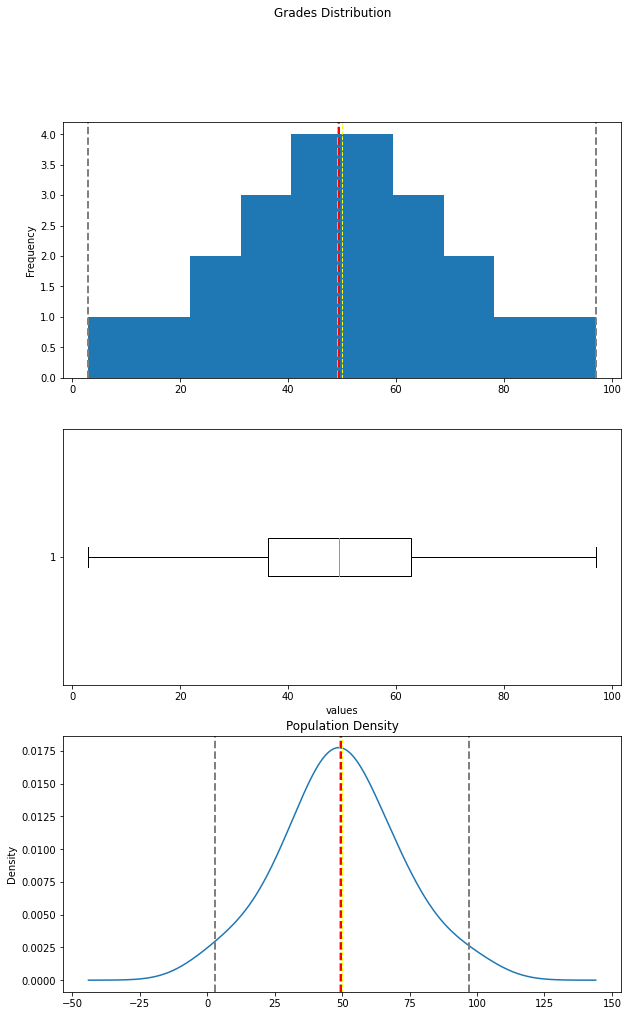

In [35]:
#create a function to create visualization
def show_distribution(var):
  from matplotlib import pyplot as plt
  #get statistics
  mean = var.mean()
  mode = var.mode()
  median = var.median()
  min = var.min()
  max = var.max()
  mode = int(mode)
  #print statistics
  print(f'mean = {mean}\nMode = {mode}\nMedian = {median}\nMin = {min}\nMax = {max}')

#create a figure with 2 subplots(10,4 and 2 rows, 1 column)
  fig, ax = plt.subplots(3,1, figsize = (10,16))
  #create histogram
  ax[0].hist(var)
  ax[0].set_ylabel('Frequency')
#create lines
  ax[0].axvline(x=min, color = 'gray', linestyle='dashed', linewidth = 2)
  ax[0].axvline(x=mean, color = 'cyan', linestyle='dashed', linewidth = 2)
  ax[0].axvline(x=median, color = 'red', linestyle='dashed', linewidth = 2)
  ax[0].axvline(x=mode, color = 'yellow', linestyle = 'dashed', linewidth = 1)
  ax[0].axvline(x=max, color = 'gray', linestyle='dashed', linewidth = 2)

#plot population density
  var.plot.density()
  #add title
  plt.title('Population Density')
  #add lines
  plt.axvline(x=min, color = 'gray', linestyle='dashed', linewidth = 2)
  plt.axvline(x=mean, color = 'cyan', linestyle='dashed', linewidth = 2)
  plt.axvline(x=median, color = 'red', linestyle='dashed', linewidth = 2)
  plt.axvline(x=mode, color = 'yellow', linestyle = 'dashed', linewidth = 1)
  plt.axvline(x=max, color = 'gray', linestyle='dashed', linewidth = 2)
  
  #create boxplot
  ax[1].boxplot(var, vert = False)
  ax[1].set_xlabel('values')

  #add title to distribution
  fig.suptitle('Grades Distribution')

  #show the figure
  fig.show()
#get the variable to display
grades = df_students['Grade']
#call the function
show_distribution(grades)


mean = 10.976190476190476
Mode = 9
Median = 10.0
Min = 6.0
Max = 16.0


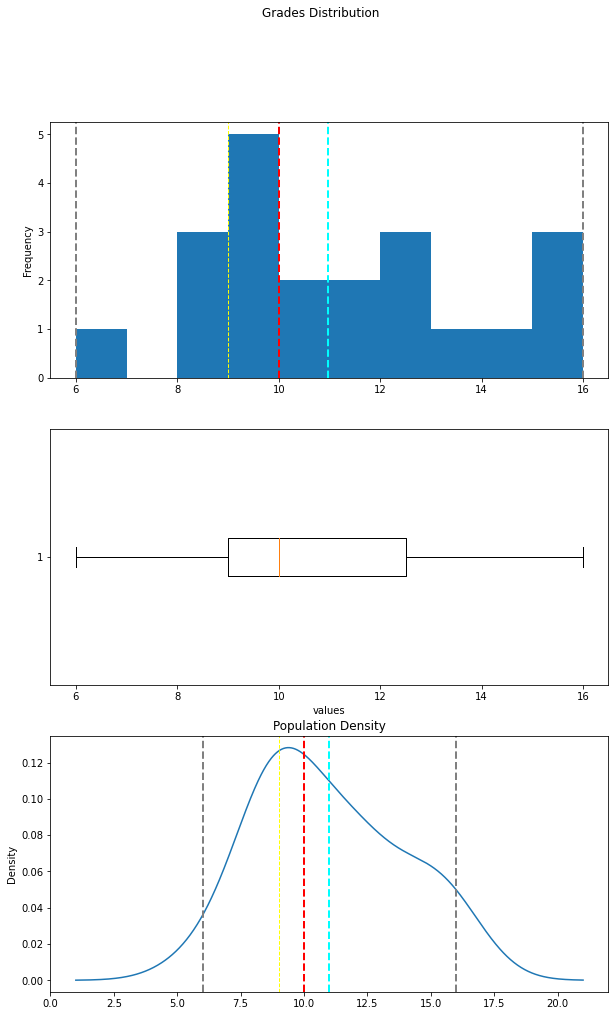

In [36]:
# calculate the 0.01th percentile
q01 = df_students.StudyHours.quantile(0.01)
# Get the variable to examine
col = df_students[df_students.StudyHours>q01]['StudyHours']
# Call the function
show_distribution(col)